## Tips and Hints
The MAV structure created from the import statement below will have all of your physical parameters (i.e., `MAV.mass` and `MAV.Jx`).
```mav_sim.parameters.aerosonde_parameters as MAV```

Note footnote 2 at the bottom of page 57 in Section 4.3 as well as the units of KV as described in aerosonde_parameters.py. The value $K_Q^2$ may come in handy as might the text right before the footnote.

Recall the error in the final equation of Section 4.3. It should read $\bf{m}_p = (-Q_p, 0, 0)^T$

You must put the ch04_test_archive.pkl file inside the mavsim_python\mav_sim\unit_tests folder. This file can be found on canvas under Files->Unit_tests.

It is often easier to debug the code using the debugger and run the code in python instead of through the Jupyter file. 

Running the file *mav_sim/unit_tests/ch4_additional_tests.py* in debug mode could be helpful. See the comments of the implemented functions in that file.

## Problem 0: Implementation of Forces and Moments
Implement the `forces_moments`, `gravitational_force`, `lateral_aerodynamics`, `longitudinal_aerodynamics`, `motor_thrust_torque`, and `update_velocity_data` functions in `chap4/mav_dynamics.py` as described in chapter 4. For the aerodynamic coefficients $C_L(\alpha)$ and $C_D(\alpha)$, use equations (4.9) and (4.11), respectively.

Keep in mind that there was an error in the book when listing the propulsion moment. The propulsion moment should read $m_p = (-Q_p, 0, 0)^T$.

Below are some useful code snippets and hints:
* R = Quaternion2Rotation(self._state[IND.QUAT]) # computes the rotation from body to world frame
* uvw = state[IND.VEL] # Extracts the u-v-w body axis velocities from the state vector
* MAV contains the UAV parameters (i.e., MAV.mass gives the mass and MAV.gravity is the gravity constant)
* In `forces_moments`, you will need to calculate the following:
  * gravitaional forces
  * Lift and Drag Forces
  * longitudinal forces and torques
  * lateral forces and torques
* In `motor_thrust_torque` you will do the following
  * Use the quadratic formulate to solve for motor speed
  * Use the resulting values to compute the angular speed of the propeller
  * Compute and return the thruse and torque due to the propeller
* In `update_velocity_data` you will do the following
  * Convert the wind vector to the body frame
  * Compute the airspeed
  * Compute the angle of attack
  * Compute the sideslip angle

Running the simulator requires passing a function that takes in a time value and produces a command. We'll learn about trim later, but trim trajectories are trajectories that can be flown with constant inputs. In reality the trim inputs can only be used for a small amount of time without any feedback due to disturbances. Once implemented, the following code will produce a trajectory that flights straight and steady without any need for modification.

In [3]:
# Note that this cell can be run separately to initialize for other cell blocks
import numpy as np
from mav_sim.chap3.mav_dynamics import DynamicState
from mav_sim.chap4.run_sim import run_sim
from mav_sim.message_types.msg_delta import MsgDelta
from mav_sim.message_types.msg_sim_params import MsgSimParams
from mav_sim.message_types.msg_gust_params import MsgGustParams
from mav_sim.tools.display_figures import display_data_view, display_mav_view
from mav_sim.chap2.mav_viewer import MavViewer
from mav_sim.chap3.data_viewer import DataViewer

# The viewers need to be initialized once due to restart issues with qtgraph
if 'mav_view' not in globals():
    print("Initializing mav_view")
    global mav_view
    mav_view = MavViewer()  # initialize the mav viewer
if 'data_view' not in globals():
    print("Initializing data_view")
    global data_view
    data_view = DataViewer()  # initialize view of data plots

# Initialize state values
sim_params = MsgSimParams(end_time=40., ts_plotting=0.05) # Sim ending in 40 seconds
state = DynamicState()

# Functions used below
def run_sim_and_display(delta_fnc, use_wind = False, gust_params = None):
    global mav_view
    global data_view
    data_view.reset(sim_params.start_time)
    (mav_view, data_view) = run_sim(sim_params, delta_fnc, state, mav_view, data_view, use_wind, gust_params)
    display_data_view(data_view)
    display_mav_view(mav_view)

def trim(time: float)->MsgDelta:
    """Passes out the constant trim command
    """
    # Set control surfaces
    delta = MsgDelta()
    delta.elevator = -0.1248
    delta.aileron = 0.001836
    delta.rudder = -0.0003026
    delta.throttle = 0.6768
    return delta

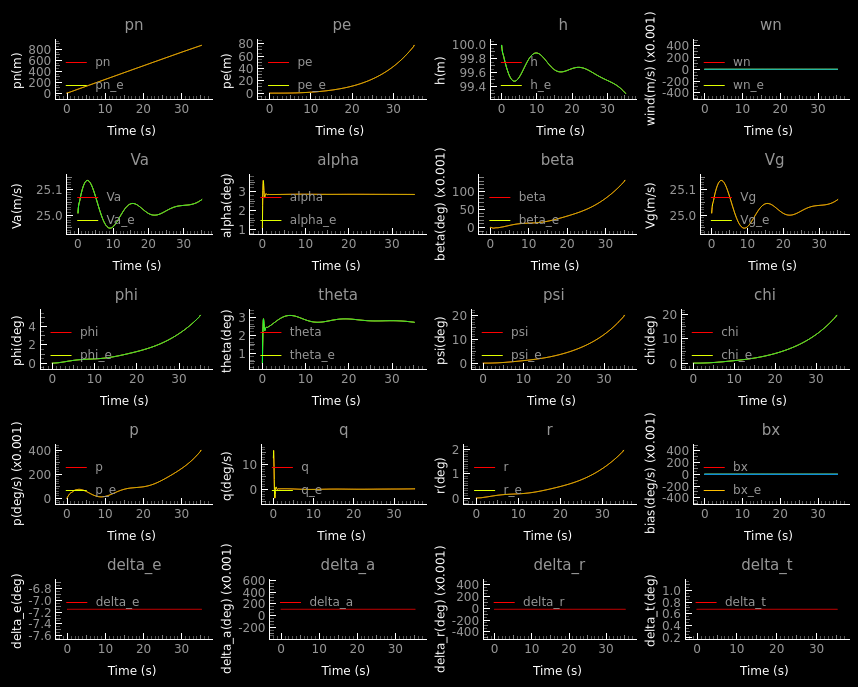

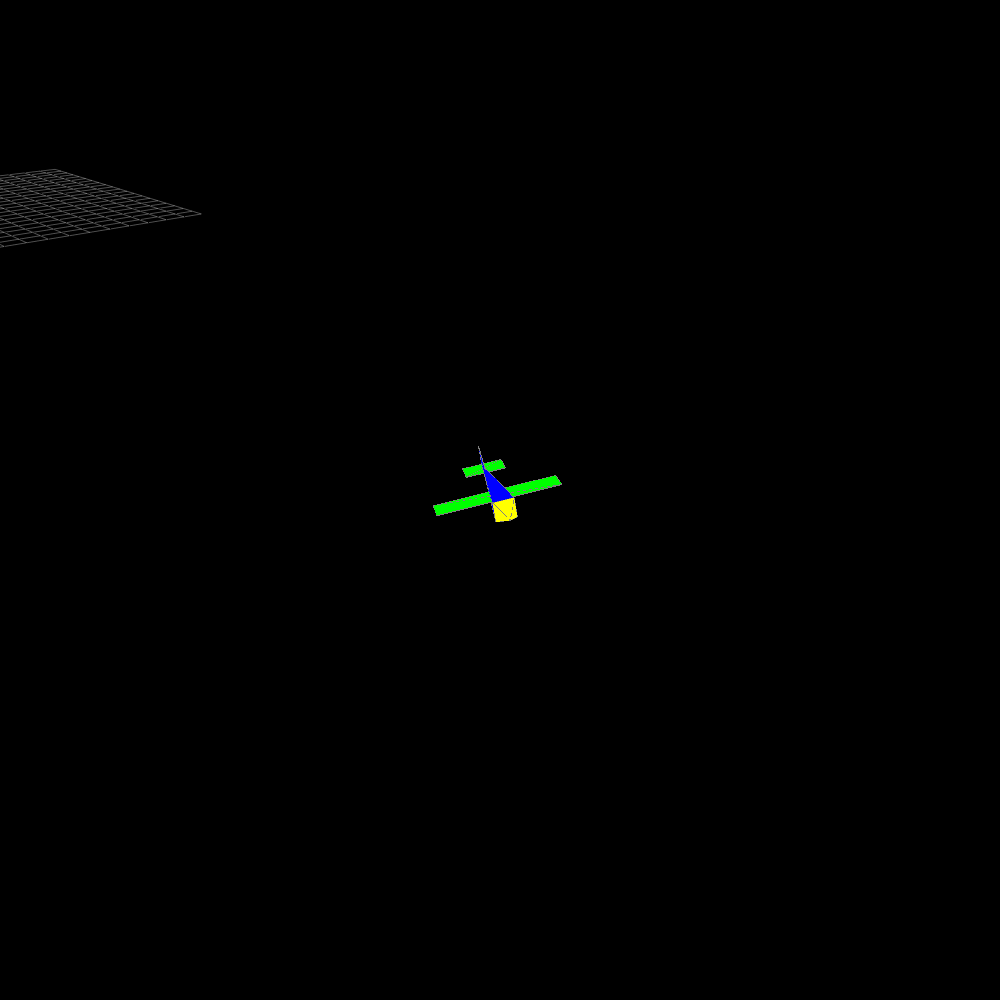

In [4]:
# Run a "straight" trim trajectory
run_sim_and_display(trim)

## Problem 1: Effect of the elevator control surface
This problem varies the elevator value during flight of the aircraft. Design a function that will perturb the elevator control surface by 5 degrees in the negative direction after 5 seconds and 5 degrees in the positive direction after 15 seconds.

### Question: Given the definitions of positive control surface deflection from chapter 4, what behavior do you expect for the altitude, Y-axis angular velocity, airspeed, and pitch angle?
**Answer:** (Answer before simulation)

Perturbing the elevator by 5 degrees in the negative after 5 seconds will cause the vehicle to pitch angle upward, resulting in an increase of altitude, a short increase in y-axis angular velocity in the positive direction, the airspeed will decrease.

Perturbing the elevator by 5 degrees in the positive after 15 seconds will cause the vehicle to pitch angle downward, resulting in a loss of altitude, a short increase in y-axis angular velocity in the negative direction, the airspeed will decrease.

Run the simulation and verify the expected behavior.

### Question: Was the behavior as expected? If not, what did you observe differently from what you thought you would? Why did this difference occur?
**Answer:** 

The vehicle followed the behavior mostly as predicted, but I did not predict the secondary effects which caused the vehicle to roll slightly to the left.

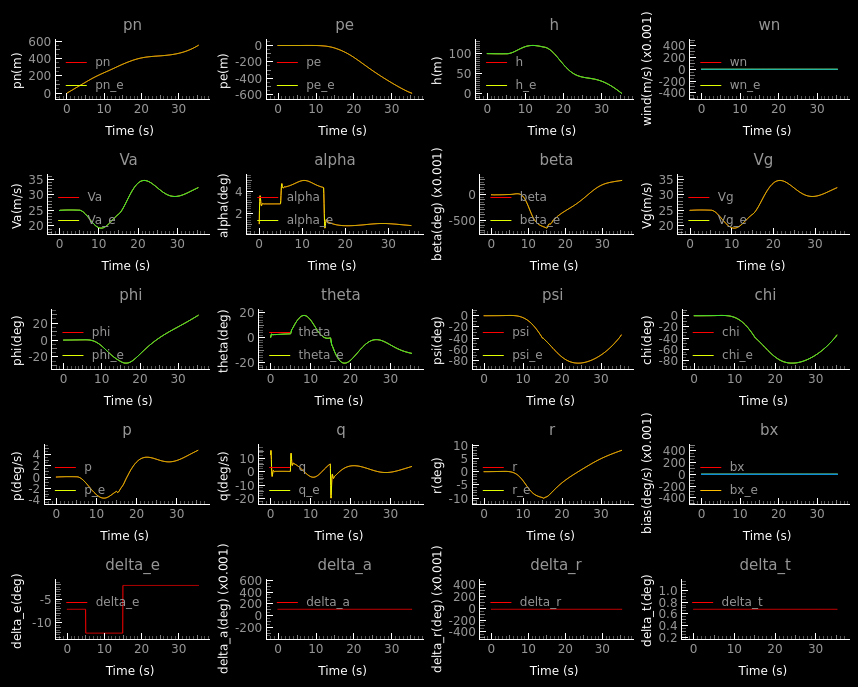

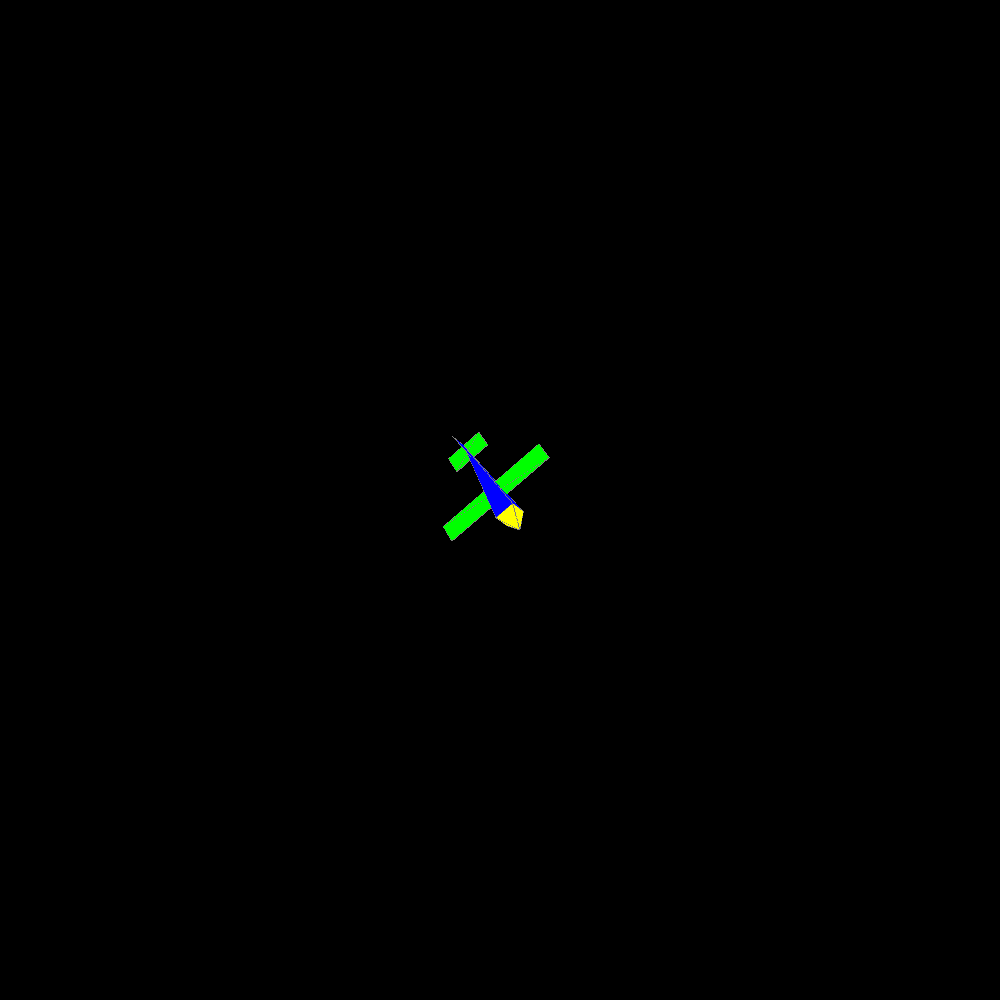

In [5]:
def perturb_elevator(time: float) -> MsgDelta:
    """ Perturb the elevator trim commands by
            -5 degrees      5 < time <= 15
            5  degrees      15 < time
    """
    delta = trim(time)
    if time > 15.:
        delta.elevator += 5*np.pi/180. # Perturb up by 5 degrees
    elif time > 5:
        delta.elevator += -5*np.pi/180. # Perturb down by 5 degrees
    return delta

# Perturb the elevator
run_sim_and_display(perturb_elevator)

## Problem 2: Effect of the aileron control surface
This problem varies the aileron value during flight of the aircraft.  Design a function that will perturb the aileron control surface by 0.2 degrees in the negative direction after 5 seconds and 0.2 degrees in the positive direction after 15 seconds.

### Question: Given the definitions of positive control surface deflection from chapter 4, what behavior do you expect for X-axis angular velocity, roll angle, and heading?
**Answer:** (Answer before simulation)

(Insert before simulation)

Initially with a negative aileron, this will cause the vehicle to roll to the left, the X-axis angular velocity will increase in the negative, causing the roll angle to increase in the negative, the secondary effects will cause the heading to move towards the east.

The positive ailernon pertubation will cause the vehicle to roll to the right, the X-axis angular velocity will increase, causing the roll angle to increase, the secondary effects will cause the heading to move towards the west.

### Question: Was the behavior as expected? If not, what did you observe differently from what you thought you would? Why did this difference occur?
**Answer:** 

The effects were not as drastic as I assumed, but the vehicle did initially roll to the left and after 15 seconds roll the other way until it leveled out.

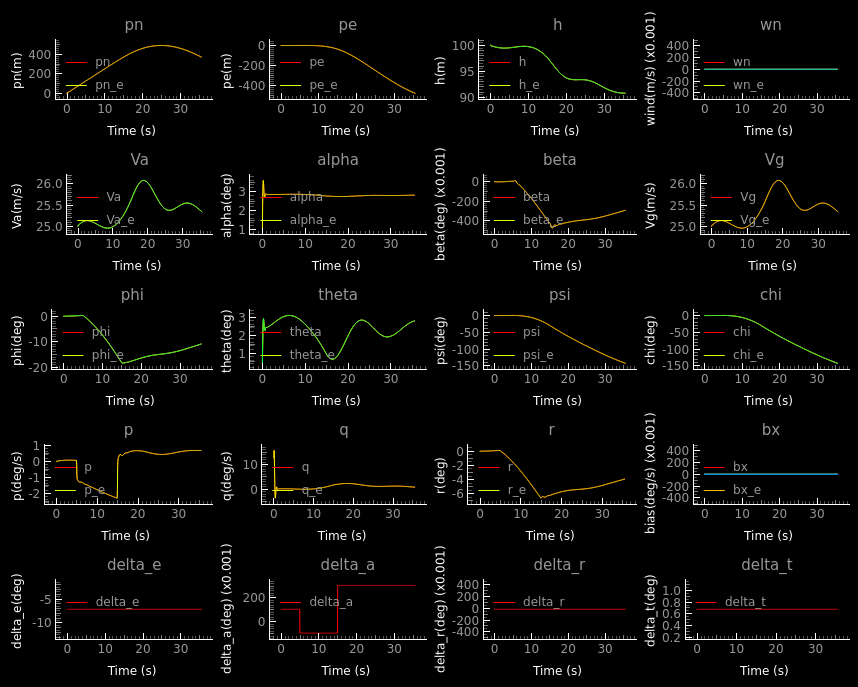

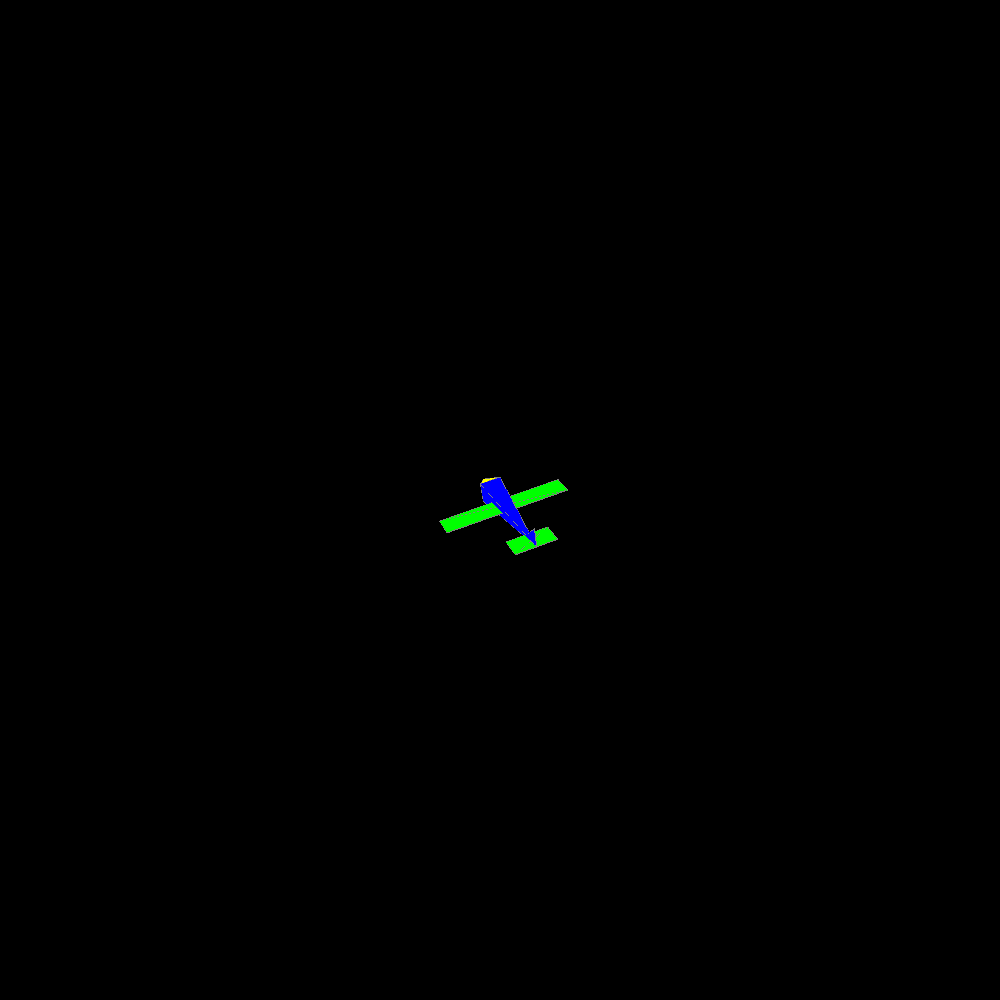

In [7]:
def perturb_aileron(time: float) -> MsgDelta:
    """ Perturb the aileron trim commands by
            -0.2 degrees      5 < time <= 15
            0.2  degrees      15 < time
    """
    # Calculate the trim trajectory
    delta = trim(time)

    # Perturb the control
    if time > 15.:
        delta.aileron += 0.2*np.pi/180. 
    elif time > 5:
        delta.aileron += -0.2*np.pi/180. 

    # Return the perturbed control
    return delta

# Perturb the elevator
run_sim_and_display(perturb_aileron)

## Problem 3: Effect of the rudder control surface
This problem varies the rudder value during flight of the aircraft.  Design a function that will perturb the rudder control surface by 0.2 degrees in the negative direction after 5 seconds and 0.2 degrees in the positive direction after 15 seconds.

### Question: Given the definitions of positive control surface deflection from chapter 4, what behavior do you expect for Z-axis angular velocity, heading angle, and roll angle?
**Answer:** (Answer before simulation)

Since the z-axiz points towards the earth, a 0.2 degree pertubation of the rudder in the negative direction will cause the plane to move left, causing an increase in the negative angular velocity, and the heading angle psi will increase in the negative as well. Due to secondary effects, the roll angle of the aircraft will increase in the negative causing the plane to roll left.

After 15 seconds, a 0.2 degree pertubation of the rudder in the positive direction will cause the plane to move right, causing an increase in the angular velocity, and the heading angle psi will increase. Due to secondary effects, the roll angle of the aircraft will increase in the positive causing the plane to roll right.

Run the simulation and verify the expected behavior.

### Question: Was the behavior as expected? If not, what did you observe differently from what you thought you would? Why did this difference occur?
**Answer:** 

I mixed up the direction of the rudder, a negatve rudder change would cause the vehicle to go right, and a positive rudder change would cause the vehicle to go left. 

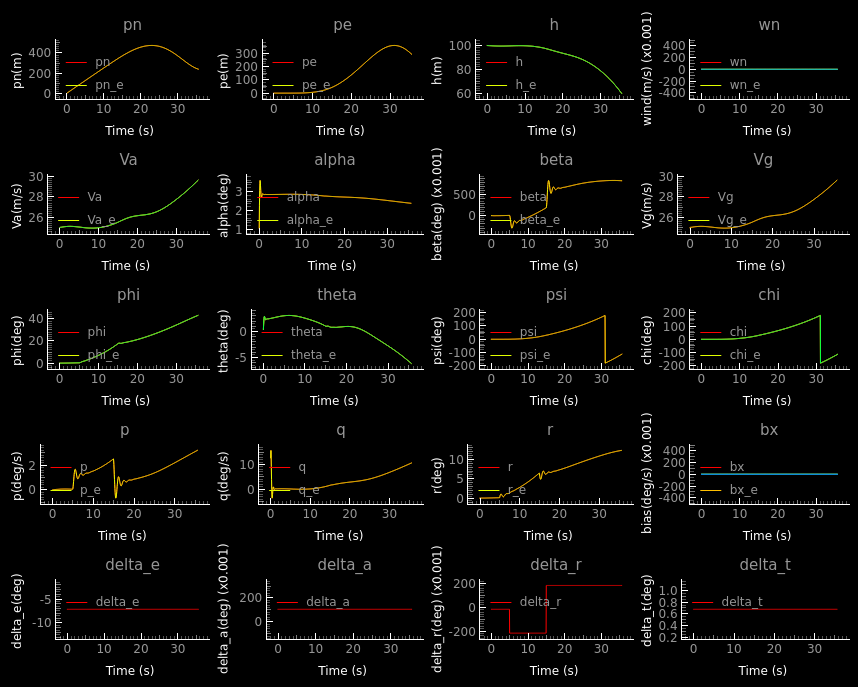

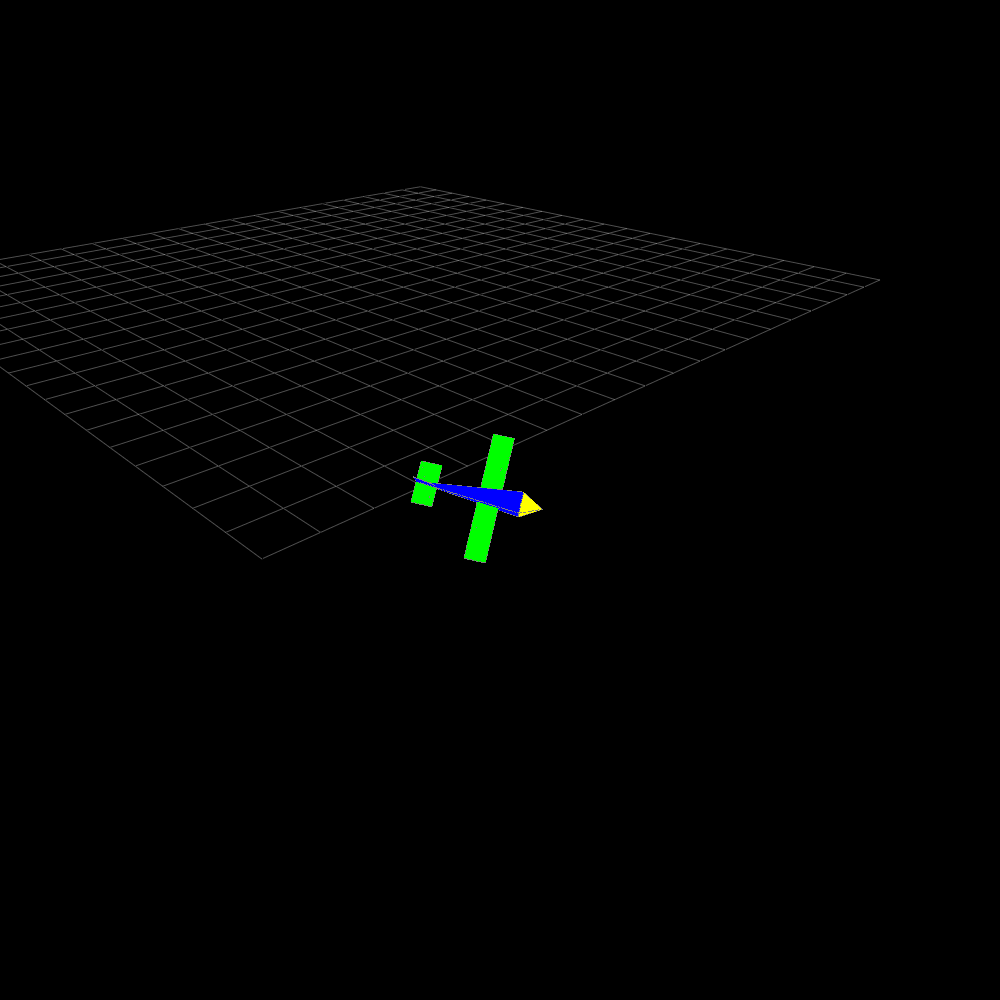

In [8]:
def perturb_rudder(time: float) -> MsgDelta:
    """ Perturb the rudder trim commands by
            -0.2 degrees      5 < time <= 15
            0.2  degrees      5 < time
    """
    # Calculate the trim trajectory
    delta = trim(time)

    # Perturb the control
    if time > 15.:
        delta.rudder += 0.2*np.pi/180. 
    elif time > 5:
        delta.rudder += -0.2*np.pi/180. 

    # Return the perturbed control
    return delta

# Perturb the elevator
run_sim_and_display(perturb_rudder)

## Problem 4: Effect of the throttle control input
This problem varies the throttle value during flight of the aircraft.  Design a function that will perturb the throttle by 0.2 in the negative direction after 5 seconds and 0.2 in the positive direction after 15 seconds.

### Question: Given the definitions of positive thrust from chapter 4, what behavior do you expect for airspeed,  altitude, and roll rates?
**Answer:** (Answer before simulation)
The decrease in thrust will cause the airspeed to decrease along with altitude, a decrease in thrust will cause a positive moment about the x-axis, causing an increase in the roll rate.
The increase in thrust will cause the airspeed to increase along with altitude, an increase in thrust will cause a negative moment about the x-axis, causing an increase in the roll rate in the negative.

Run the simulation and verify the expected behavior.

### Question: Was the behavior as expected? If not, what did you observe differently from what you thought you would? Why did this difference occur?
**Answer:** 

The behavior was as expected.

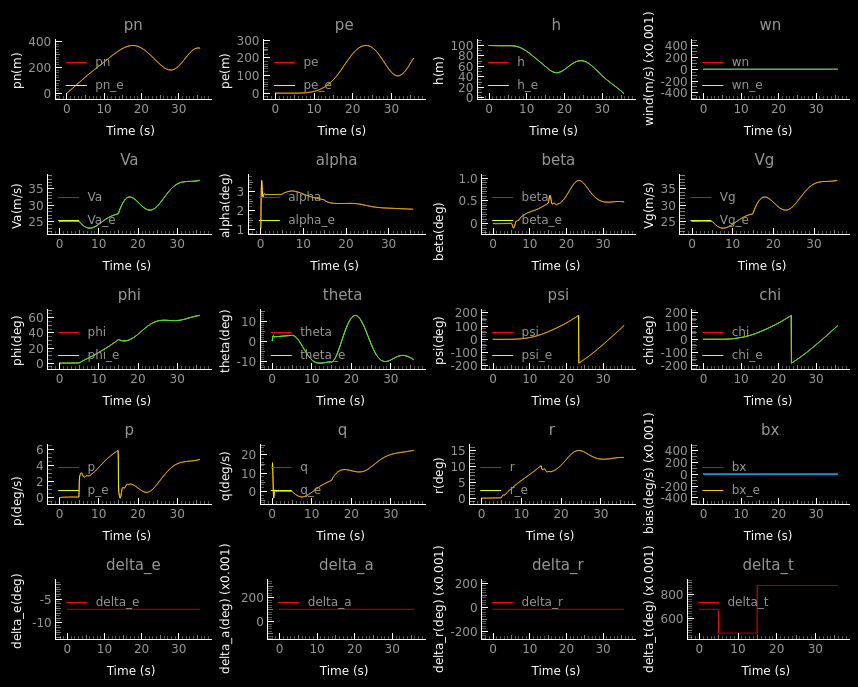

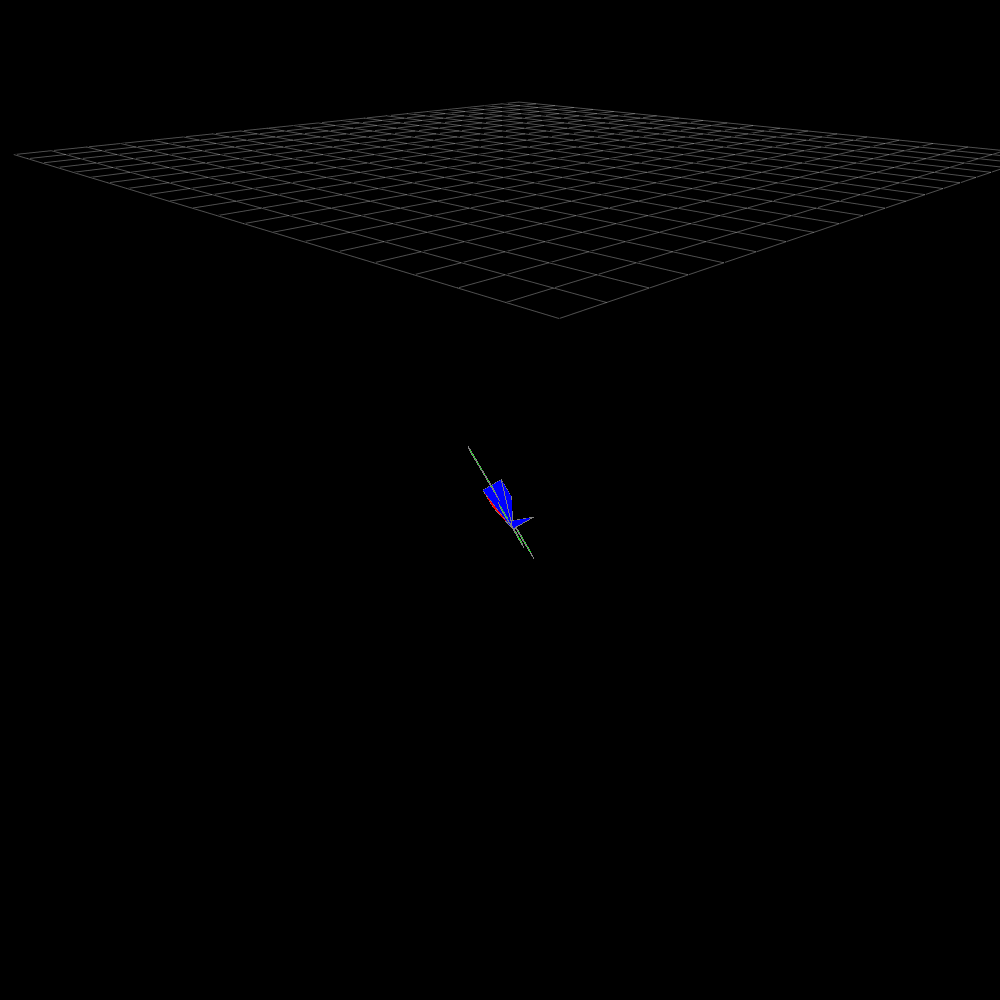

In [9]:
def perturb_throttle(time: float) -> MsgDelta:
    """ Perturb the throttle trim commands by
            -0.2       5 < time <= 15
            0.2        5 < time
    """
    # Calculate the trim trajectory
    delta = trim(time)

    # Perturb the control
    if time > 15.:
        delta.throttle += 0.2
    elif time > 5:
        delta.throttle += -0.2
    # Return the perturbed control
    return delta

# Perturb the elevator
run_sim_and_display(perturb_throttle)

## Problem 5: Wind model implementation
The previous problems did not consider wind. You will now implement the Dryden gust model as defined in Chapter 4.4 of the book. Namely, you will implement the transfer functions in the `__init__` function of `wind_siumulation.py`. 

For example, the parameter *self.u_w* is a transfer function of the form
$$
    H_u(s) = \sigma_u \sqrt{\frac{2V_a}{\pi L_u}} \frac{1}{s+\frac{V_a}{L_u}}
$$
This results in a transfer function with the numerator and denominator defined as
$$
numerator = \sigma_u \sqrt{\frac{2V_a}{\pi L_u}}
$$
$$
denominator = s+\frac{V_a}{L_u}
$$
The numerators and denominators are passed into a `TransferFunction` class that is provided to you by specifying their coefficients. The above equation for $H_u(s)$ can be implemented as follows:
```
a1 = sigma_u*np.sqrt(2.*Va/(np.pi*Lu))
b1 = Va/Lu
self.u_w = TransferFunction(num=np.array([[a1]]),
                            den=np.array([[1, b1]]),
                            Ts=Ts)
```
In `wind_siumulation.py`, you will initialize the following
* `self.u_w` is the transfer function $H_u(s)$
* `self.v_w` is the transfer function $H_v(s)$
* `self.w_w` is the transfer function $H_w(s)$

## Problem 6: Using non-zero wind parameters
You will now run the simulation with a set of parameters for the Dresden gust model from Table 4.1 of the book. Use the medium altitude, moderate turbulence model parameters.

### Question: What effects do you expect to see on the states for the medium altitude, moderate turbulence model as compared to the results of Problem 0?
**Answer:** (Answer before simulation)

In problem 0, the plane flew initially straight in the north direction, then veered off in the east direction with a positive roll rate, and eventually falling out of the sky.

My prediction for this simulation is that the behavior will be a lot more eratic, i.e the plane will still fly initially in the north direction, but the effects of the wind and 
altitude will cause the vehicle to fall much faster and more chaotically, affectiing all parameters.
Run the simulation and verify the expected behavior.

### Question: Was the behavior as expected? If not, what did you observe differently from what you thought you would? Why did this difference occur?
**Answer:** 

The vehicle flew fairly similarly to problem 0, but now it had very obvious noise in its angles and roll rates.

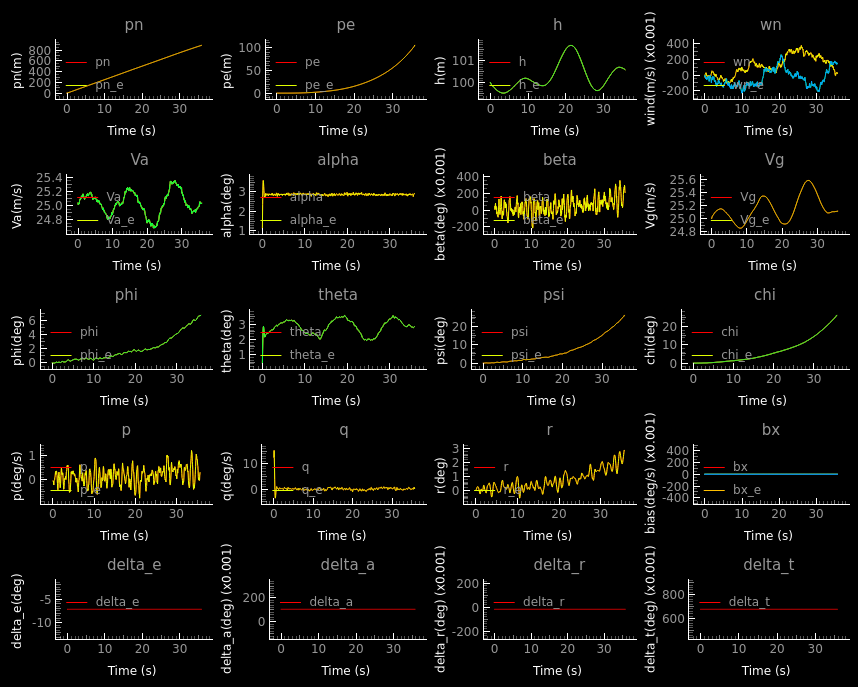

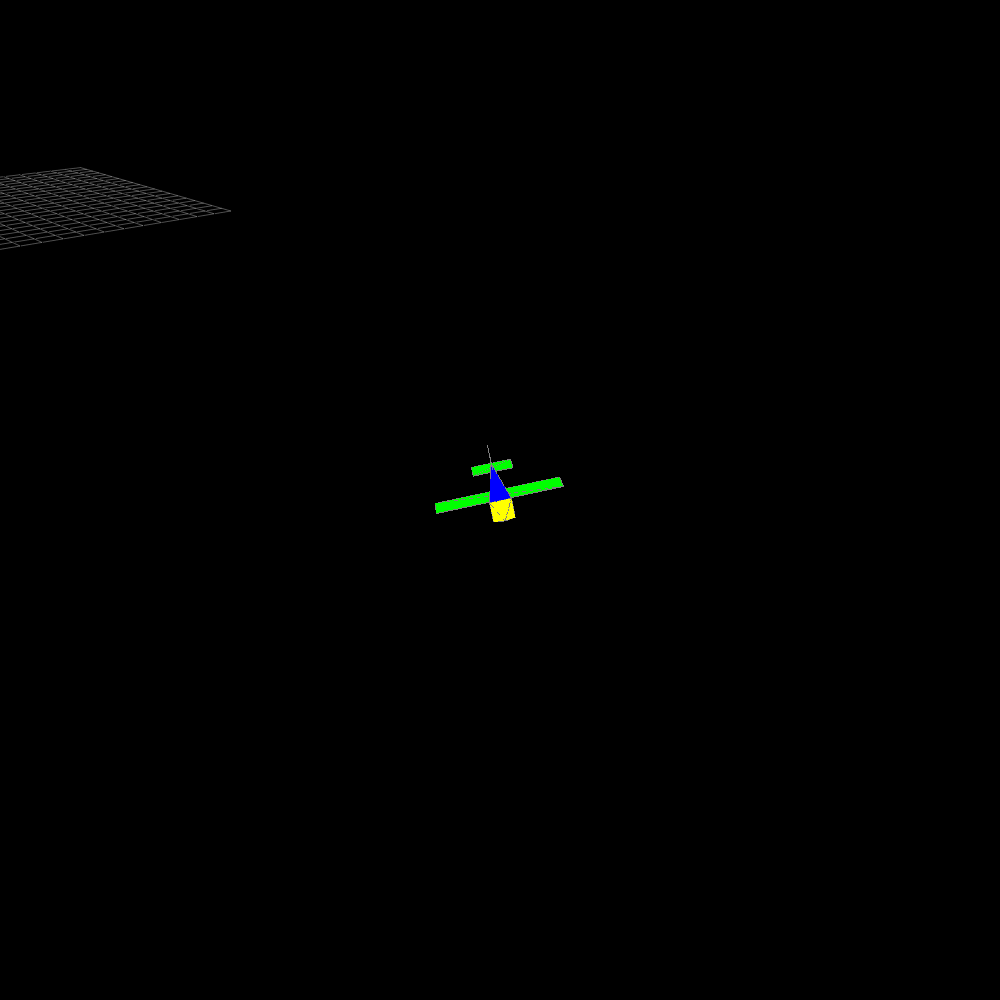

In [10]:
# Run a "straight" trim trajectory with medium altitude, moderate turbulence
gust_params = MsgGustParams()
gust_params.sigma_u = 3. # Set values for the remaining variables
gust_params.sigma_v = 3.
gust_params.sigma_w = 3.
gust_params.Lw = 533.
gust_params.Lu = 533.
gust_params.Lv = 533.

run_sim_and_display(trim, use_wind=True, gust_params=gust_params)

## Static analysis
Run the static code analysis (you must have zero static code analysis errors to get credit). You may not modify the static code analysis configuration files.

### ISORT
Run Isort:
```
python -m isort mav_sim book_assignments
```

Terminal output (should be nothing):

### MyPy
Run MyPy
```
python -m mypy mav_sim/chap2/ mav_sim/chap3/ mav_sim/chap4/ book_assignments
```

Terminal output (should indicate no error):
```
Success: no issues found in 25 source files
```

### Pylint
Run Pylint
```
python -m pylint --jobs 0 --rcfile .pylintrc mav_sim/chap2/ mav_sim/chap3/ mav_sim/chap4/ book_assignments/
```

Terminal output (should indicate `10/10`)
```
Your code has been rated at 10.00/10 (previous run: 10.00/10, +0.00)
```

## Simple code checking
The following code does not need to change. It is just used to know if the code is implemented properly. The output should not have any lines reading `Failed test!`

In [11]:
from mav_sim.unit_tests.ch4_dynamics_test import run_all_tests, ForcesMomentsTest, MotorThrustTorqueTest, UpdateVelocityTest, WindSimulationTest, GravitationalForceTest, LateralDynamicsTest, LongitudinalDynamicsTest
run_all_tests()


Starting gravitational_force test
Passed test on gravitational_force

Starting lateral_aerodynamics test
Passed test on lateral_aerodynamics

Starting longitudinal_aerodynamics test
Passed test on longitudinal_aerodynamics

Starting forces_moments test
Passed test on forces_moments

Starting motor_thrust_torque test
Passed test on motor_thrust_torque

Starting update_velocity_data test
Passed test on update_velocity_data

Starting WindSimulation test
Passed test on WindSimulation
